## DBSCAN Clustering Animation

✔ Shows core, border, and noise

✔ Expanding ε neighborhood

✔ Cluster formation

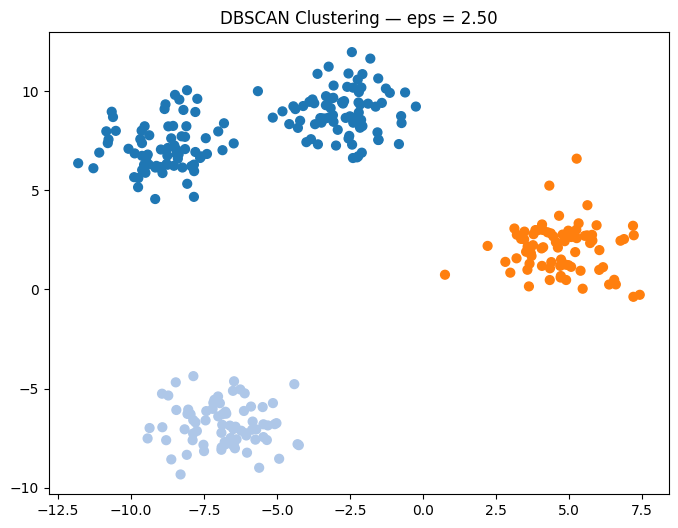

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Create GIF folder
os.makedirs("gifs", exist_ok=True)

# Generate data
X, _ = make_blobs(
    n_samples=300, centers=4,
    cluster_std=1.2, random_state=42
)

# eps values for animation
eps_values = np.linspace(0.1, 2.5, 40)

# Colors for up to 20 clusters (repeated safely)
colors = plt.cm.tab20(np.linspace(0, 1, 20))
colors = np.vstack([colors] * 20)   # expand to 400 colors

fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter([], [], s=40)

def update(i):
    eps = eps_values[i]

    # DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X)

    # Noise label = -1 → assign unique color
    display_colors = []
    for l in labels:
        if l == -1:
            display_colors.append("black")   # noise
        else:
            display_colors.append(colors[l])

    scatter.set_offsets(X)
    scatter.set_color(display_colors)

    ax.set_title(f"DBSCAN Clustering — eps = {eps:.2f}")
    ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
    ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)

    return scatter,

ani = FuncAnimation(fig, update, frames=len(eps_values), interval=300)

# Save GIF
ani.save("gifs/dbscan_clustering.gif", writer="pillow")

plt.show()
